In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic-passengers.csv",sep=";") #load out dataset
df.head() #viewing the head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
print(df.dtypes)
print(df.isnull().sum())
print(df.shape)

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [3]:
#Nettoyages des données
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.dropna(axis = 0, subset = ['Embarked'], inplace= True )
df['Cabin'].fillna('PN', inplace = True)

In [4]:
#Transformations des données
sex_trans = {"Sex" : {"male" : 1, "female" : 0}}
survi_trans = {"Survived" : {"Yes" : 1, "No" : 0}}
df.replace(sex_trans, inplace= True)
df.replace(survi_trans, inplace= True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,PN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,PN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,PN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
#Transformations
embark_one= pd.get_dummies(df['Embarked'])
df = df.join(embark_one)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,PN,S,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,PN,S,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,PN,S,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,0,0,1


<AxesSubplot:xlabel='Age', ylabel='Count'>

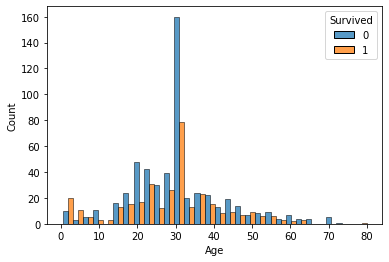

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
""""plt.figure(figsize= (12,8))
plt.hist(df['Age'])
plt.title("Observation de l'Age")
"""
#Début des visualisation
sns.histplot(data=df, x="Age", hue="Survived", multiple="dodge")

<AxesSubplot:xlabel='Sex', ylabel='count'>

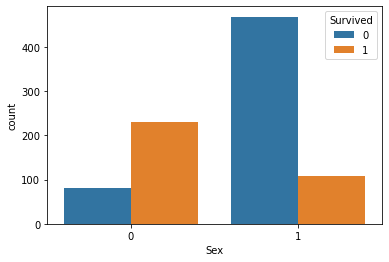

In [7]:
sns.countplot(x="Sex", data=df, hue = "Survived")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

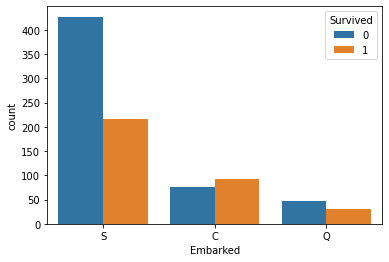

In [8]:
sns.countplot(x="Embarked", data=df, hue = "Survived")

<AxesSubplot:xlabel='Age'>

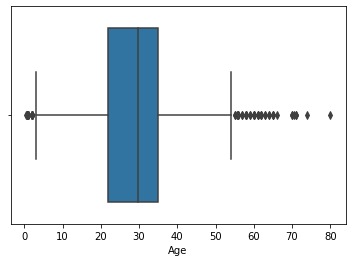

In [9]:
sns.boxplot(x=df["Age"])

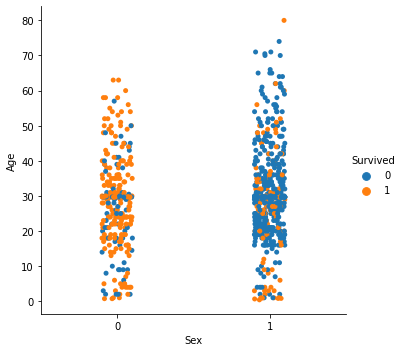

In [10]:
sns.catplot(x="Sex", y="Age", hue="Survived", data=df)

C:\Users\Administrateur\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


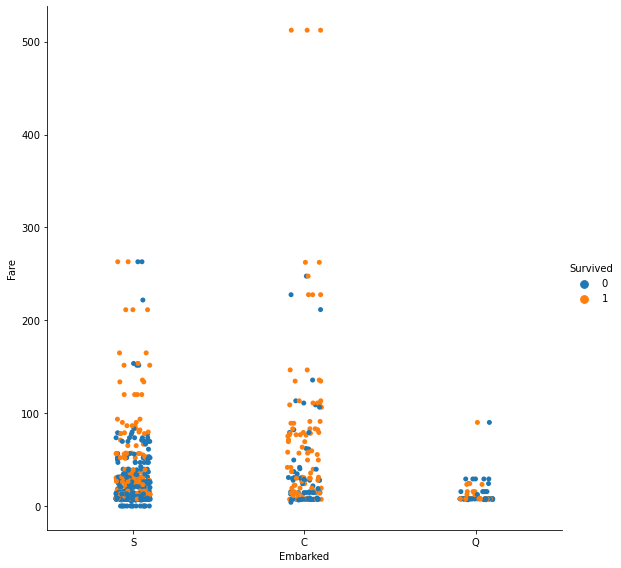

In [11]:
sns.catplot(x="Embarked", y="Fare", hue="Survived", data=df, size= 8)

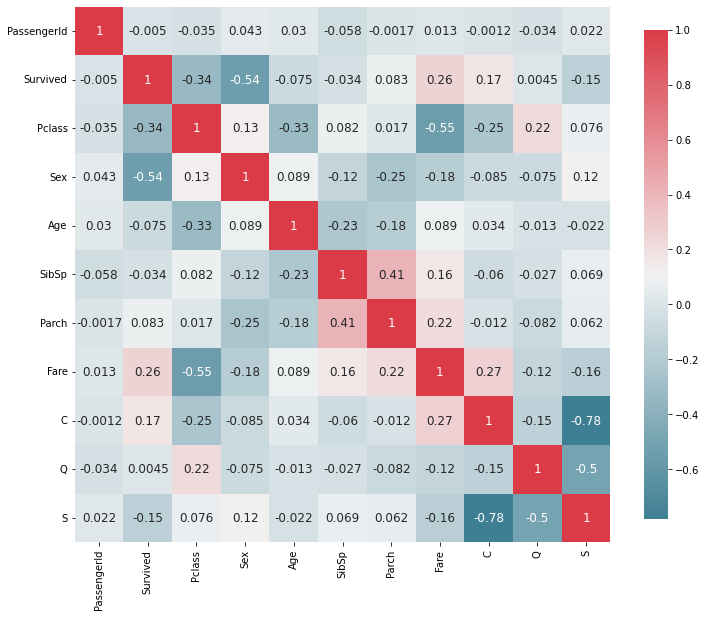

In [12]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [13]:
"""The function use gives us the correlation coefficient between the values ​​of each column.
First we observed two different colors which are red and blue, dark red (1) and dark blue (-1) indicate
whether there is a strong correlation or not. If the correlation is strong between two values, the coefficient tends towards Un and the pallet acquires a red color.
If the correlation is also strong and tends towards minus One, we can say that one of these values ​​causes the other to fall.
If the correlation is closer to Zero, the correlation of these two values ​​is weak.
For example, we can say that there is a strong correlation between Fare and Pclass.
"""

'The function use gives us the correlation coefficient between the values \u200b\u200bof each column.\nFirst we observed two different colors which are red and blue, dark red (1) and dark blue (-1) indicate\nwhether there is a strong correlation or not. If the correlation is strong between two values, the coefficient tends towards Un and the pallet acquires a red color.\nIf the correlation is also strong and tends towards minus One, we can say that one of these values \u200b\u200bcauses the other to fall.\nIf the correlation is closer to Zero, the correlation of these two values \u200b\u200bis weak.\nFor example, we can say that there is a strong correlation between Fare and Pclass.\n'

In [14]:
df[['Pclass', 'Survived']].groupby(['Pclass'],as_index= True).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [15]:
#Suppression des col
df = df.drop(['Cabin','PassengerId', 'Ticket'], axis =1)


In [16]:
#Creation Title
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,0,0,1,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,0,0,1,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,0,0,1,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,0,0,1,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,0,0,1,Mr


In [18]:
df.shape

(889, 13)

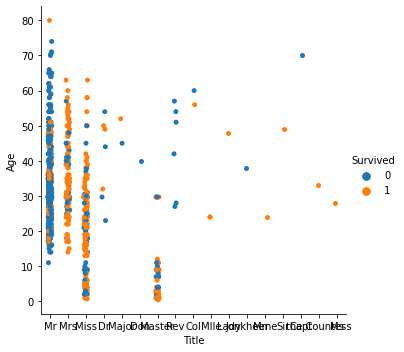

In [19]:
sns.catplot(x="Title", y="Age", hue="Survived", data=df)

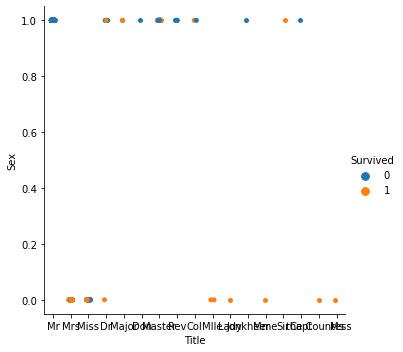

In [20]:
sns.catplot(x="Title", y="Sex", hue="Survived", data=df)

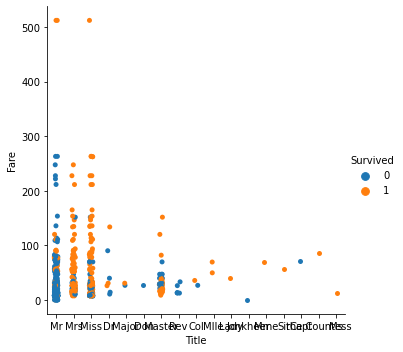

In [21]:
sns.catplot(x="Title", y="Fare", hue="Survived", data=df)

In [22]:
Dictionary = {

                      "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [23]:
df['Title']= df['Title'].replace(Dictionary, regex= True) 

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,0,0,1,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,0,0,1,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,0,0,1,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,0,0,1,Mrss
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,0,0,1,Mrs


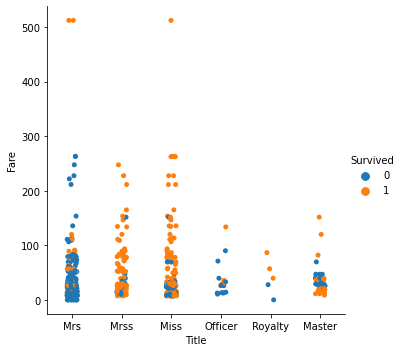

In [25]:
sns.catplot(x="Title", y="Fare", hue="Survived", data=df)

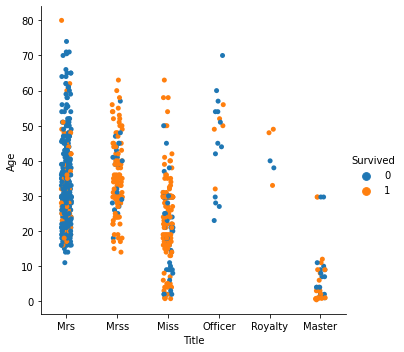

In [26]:
sns.catplot(x="Title", y="Age", hue="Survived",  data=df)

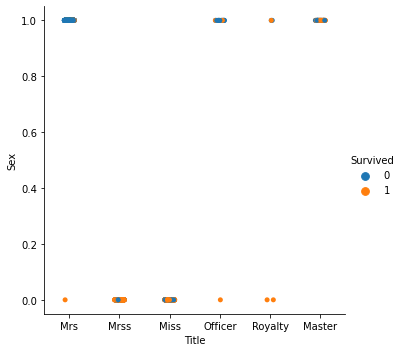

In [27]:
sns.catplot(x="Title", y="Sex",hue= "Survived", data=df)

In [28]:
df['FamilySize'] = df.Parch + df.SibSp

In [29]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,Title,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,0,0,1,Mrs,0
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,0,0,1,Mrs,0
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,0,0,1,Mrs,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,0,0,1,Mrss,4
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,0,0,1,Mrs,1


In [30]:
df['Family_conv']= df.FamilySize >=1
df['Family_conv']= df['Family_conv'].astype(int)

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,Title,FamilySize,Family_conv
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,S,0,0,1,Mrs,0,0
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,S,0,0,1,Mrs,0,0
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,S,0,0,1,Mrs,0,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,S,0,0,1,Mrss,4,1
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,S,0,0,1,Mrs,1,1


<AxesSubplot:xlabel='Family_conv', ylabel='count'>

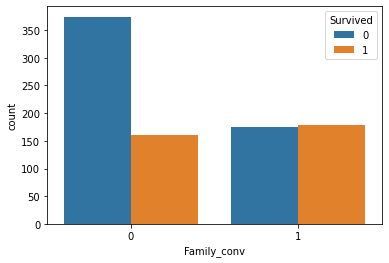

In [32]:
sns.countplot(x="Family_conv", data=df, hue = "Survived")

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

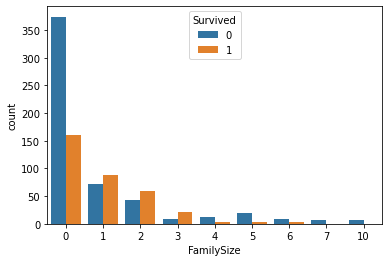

In [33]:
sns.countplot(x="FamilySize", data=df, hue = "Survived")

# Feature selection
 Sex , Age, Family_conv sont les colonnes choisient pour connaitre, par l'abre de decision et la forêt aléatoire  qui nous permet de classifier notre réponse , si un passager a survecu oui ou non. 
 

In [34]:
df = df[["Survived","Age","Sex","Family_conv"]]

In [35]:
df.head() #my new dataset

,Survived,Age,Sex,Family_conv
0,0,28.0,1,0
1,0,25.0,1,0
2,0,20.0,1,0
3,0,29.0,0,1
4,0,31.0,1,1


In [36]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
#features extraction
y = df["Survived"]
x = df.drop("Survived", axis = 1)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  #splitting data with test size of 30%

In [39]:
#applying tree algorithm
model = tree.DecisionTreeClassifier(max_depth=3, random_state=0, criterion = "gini", splitter="random", max_features= 2)  

k=model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model

In [40]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8202247191011236


# Decision Tree Plot


In [41]:
from sklearn.tree import plot_tree

[Text(418.5, 475.65000000000003, 'Sex <= 0.046\ngini = 0.472\nsamples = 622\nvalue = [384, 238]\nclass = mort'),
 Text(209.25, 339.75, 'Age <= 12.895\ngini = 0.407\nsamples = 222\nvalue = [63, 159]\nclass = vivant'),
 Text(104.625, 203.85000000000002, 'Family_conv <= 0.252\ngini = 0.488\nsamples = 26\nvalue = [11, 15]\nclass = vivant'),
 Text(52.3125, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = vivant'),
 Text(156.9375, 67.94999999999999, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]\nclass = vivant'),
 Text(313.875, 203.85000000000002, 'Age <= 51.225\ngini = 0.39\nsamples = 196\nvalue = [52, 144]\nclass = vivant'),
 Text(261.5625, 67.94999999999999, 'gini = 0.399\nsamples = 185\nvalue = [51, 134]\nclass = vivant'),
 Text(366.1875, 67.94999999999999, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = vivant'),
 Text(627.75, 339.75, 'Family_conv <= 0.114\ngini = 0.317\nsamples = 400\nvalue = [321, 79]\nclass = mort'),
 Text(523.125, 203.85000000000002, 'Age <

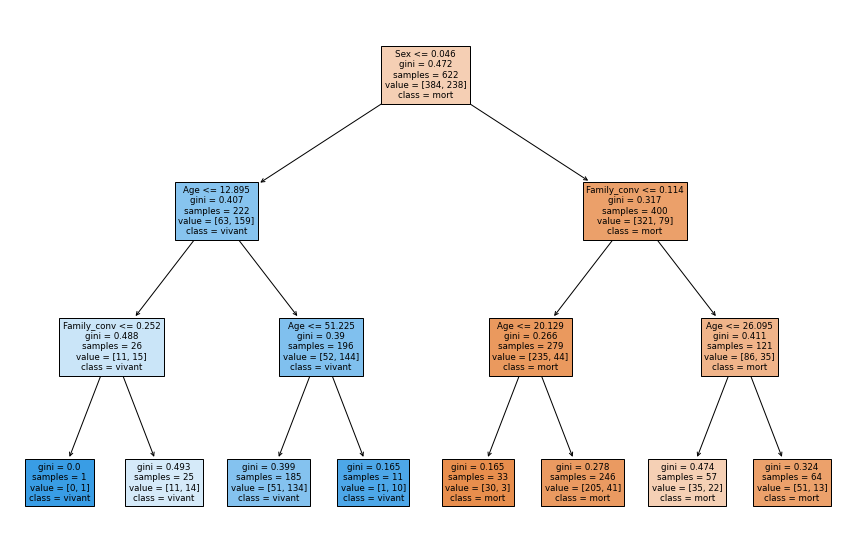

In [42]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=list(x),class_names=['mort','vivant'], filled= True )


we observe that most men aged 20 or less are classified as dead

# Modification of some parameters
we will modify the depth of our tree, change the metric of the impurity by the entropy and leave the maximum of functionality in default


In [43]:
#applying tree algorithm
second_model = tree.DecisionTreeClassifier(max_depth=6,  criterion = "entropy", splitter="best")  

second_model.fit(x_train, y_train)   #fitting our model
y_predee=second_model.predict(x_test)   # evaluating our model

# Calculation of new accuracy

In [44]:
print("score:{}".format(accuracy_score(y_test, y_predee)))

score:0.8052434456928839


we notice that the accuracy has decreased

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [46]:
model=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
model.fit(x_train, y_train)  #Training our model
y_pred=model.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7565543071161048


In [47]:
modele=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
modele.fit(x_train, y_train)  #Training our model
y_prede=modele.predict(x_test)  #testing our model


In [48]:
print("Accuracy:", accuracy_score(y_test, y_prede))  #Measuring the new  accuracy of our model

Accuracy: 0.7565543071161048


we notice that the accuracy has decreased